In [19]:
#Importing Libraries 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
%matplotlib inline
import seaborn as sns 
import numpy as np 
import pandas as pd
import os 
import re 
import nltk
import string
import regex


### Data loading and Preprocessing

Loading Data

In [21]:
train = pd.read_csv('train.csv',encoding='utf-8')
test = pd.read_csv('test.csv', encoding='utf-8')

Data Exploration

In [22]:
print(train.shape,test.shape)

(20800, 5) (5200, 4)


In [23]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Handling Missing values

In [24]:
print(train.isnull().sum())
print("****************")
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
****************
id          0
title     122
author    503
text        7
dtype: int64


In [25]:
test=test.fillna(' ')
train=train.fillna(' ')

In [26]:
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

# Text Preprocessing

## Wordcloud
to explore the most frequent words in real and fake news articles

Tokenization

In [27]:
real_words=''
fake_words=''

# Get the set of stopwords

stopwords= set(STOPWORDS)

# Extract words from real news

for val in train[train ['label']==1].total:
    tokens=val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    real_words += " ".join(tokens)+" "

#Extract words from fake news  

for val in train[train['label']==0].total:
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    fake_words += " ".join(tokens)+" "

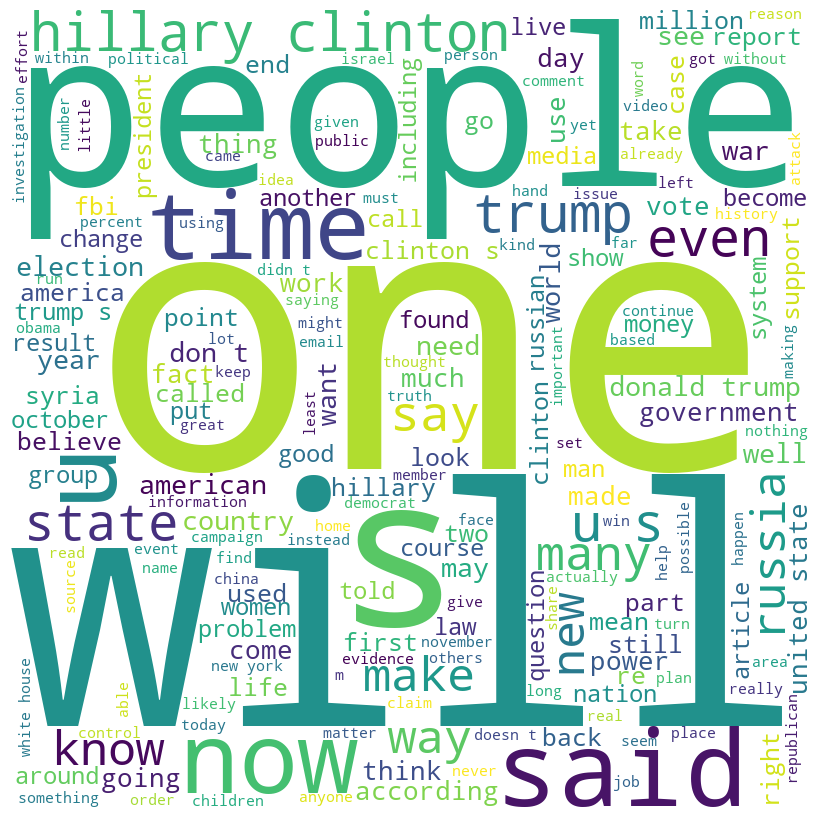

In [28]:
#Generating & Visualizing Wordcloud of real news
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,  # Use the predefined STOPWORDS from the wordcloud library
                      min_font_size=10).generate(real_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

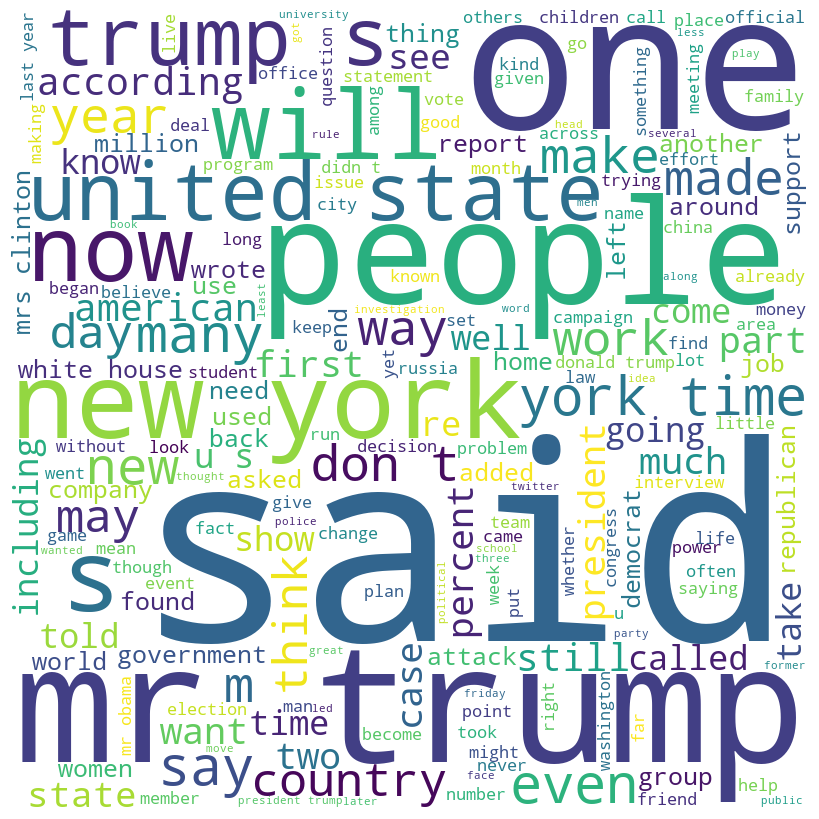

In [65]:
#Generating & Visualizing Wordcloud of fake news
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,  # Use the predefined STOPWORDS from the wordcloud library
                      min_font_size=10).generate(fake_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Cleaning and preprocessing



Removing punctuations and symbols 

In [30]:
import string
import regex

In [31]:
s = string.punctuation+"hello world"


In [32]:
s = re.sub(r'[^\w\s]', '', s)

In [33]:
print(s)

_hello world


## Tokenization 

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
nltk.word_tokenize("Hello how are you")

['Hello', 'how', 'are', 'you']

## StopWords

In [36]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words =stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
stop_words.append('hello')

In [38]:
sentence ="Covide-19 pandemic has impacted many countries and what it did to economy is awful"

In [39]:
words=nltk.word_tokenize(sentence)
words= [w for w in words if w not in stop_words]

In [40]:
words

['Covide-19', 'pandemic', 'impacted', 'many', 'countries', 'economy', 'awful']

## Lemmatization

In [41]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
input_str = 'been had done language cities nice'


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [42]:
input_str = nltk.word_tokenize(input_str)
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
nice


# Applying to our dataset

In [43]:
Lemmatize=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ' '
    
    sentence = row['total']
    #cleaning
    sentence = re.sub(r'[^\w\s]','',sentence)
    #tokenization 
    words=nltk.word_tokenize(sentence)
    #stopwords
    words = [w for w in words if not w in stop_words]
    
    for word in words : 
        filter_sentence = filter_sentence +' '+str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence
    

In [44]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didnt even see comeys lett...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breit...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why truth might get you fired consortiumnews...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike h...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished s...


In [45]:
train = train[['total','label']]

# Applying NLP

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [47]:
X_train=train['total']
Y_train=train['label']

## Bag-of-words/CountVectorizer

In [48]:
corpus={'this is the first document.',
       'this document is the second document.',
       'And this the third one.'}
vectorizer=CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [49]:
print(X.toarray())

[[0 2 0 1 0 1 1 0 1]
 [1 0 0 0 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## TF-iDF Vectorizer

In [50]:
def vectorize_text(features,max_features): 
    vectorizer = TfidfVectorizer(stop_words='english',
                                decode_error='strict',
                                analyzer='word',
                                ngram_range=(1,2),
                                max_features=max_features
                                )
    feature_vec= vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [51]:
tfidf_features = vectorize_text(['hello how are you diung','hi Im doing fine'],30)

In [52]:
tfidf_features

array([[0.57735027, 0.        , 0.        , 0.        , 0.57735027,
        0.57735027, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.37796447, 0.37796447, 0.37796447, 0.        ,
        0.        , 0.37796447, 0.37796447, 0.37796447, 0.37796447]])

# Applying to our dataset

In [53]:
#feature extraction 
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf=TfidfTransformer(norm='l2')
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [54]:
from scipy.sparse import csr_matrix
tf_idf_matrix_sparse = csr_matrix(tf_idf_matrix)


In [55]:
tf_idf_matrix_sparse.shape

(20800, 220387)

In [56]:
#tf_idf_matrix.toarray().shape

# Confusion Matrix

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Modelling

In [58]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf=tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(tf_idf_matrix,Y_train,random_state=0)

In [59]:
print(X_train.shape,X_test.shape)

(15600, 220387) (5200, 220387)


# logistic Regression 

In [60]:
from sklearn.linear_model import LogisticRegression 

In [61]:
logreg = LogisticRegression(C=1.0)
logreg.fit(X_train,Y_train)

LogisticRegression()

In [62]:
pred=logreg.predict(X_test)
print('Accuracy of Logistic classfier on testting set: {:.2f}'
     .format(logreg.score(X_test,Y_test)))
print('Accuracy of Lasso Classifier on training set: {:.2f}'
     .format(logreg.score(X_train,Y_train)))

Accuracy of Logistic classfier on testting set: 0.96
Accuracy of Lasso Classifier on training set: 0.98


In [63]:

from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(Y_test,pred)
cm

array([[2444,  120],
       [  87, 2549]], dtype=int64)

# MultinomialNB

In [64]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train,Y_train)
pred = NB.predict(X_test)
print('Accuracy of NB classifier on traing set : {:.2f}'
     .format(NB.score(X_train,Y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test,Y_test)))
cm= confusion_matrix(Y_test,pred)
cm


Accuracy of NB classifier on traing set : 0.88
Accuracy of NB classifier on test set: 0.83


array([[2558,    6],
       [ 853, 1783]], dtype=int64)

# Pipeline

In [61]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.3/9.3 MB 131.0 kB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Thinkpad\\AppData\\Roaming\\Python\\Python39\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from sklearn.pipeline import Pipeline 
import joblib
from sklearn import linear_model 


In [93]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer(norm='l2')),  # Step 2: TfidfTransformer with 'l2' norm
    ('clf', LogisticRegression(C=1e5))  # Step 3: LogisticRegression
])

In [94]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [88]:
filename='pipeline.sav'
joblib.dump(pipeline,filename)

['pipeline.sav']

In [89]:
filename = './pipeline.sav'